# **[Задание 1](https://https://github.com/pacifikus/itmo_ml_for_science_course/blob/main/HW/hw_1.md)**

# **Библиотеки**

In [ ]:
%%capture
!pip install basemap phik sweetviz

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import sweetviz as sv
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

# **1.   Сформулировать постановку задачу, которую хочется решать в рамках курса**

**Бизнес-постановка задачи:** \
Разработать модель машинного обучения для прогнозирования популярности трека/ов на платформе Spotify.  

**Постановка ML-задачи —** регрессия.

**Набор данных —** [Spotify Most Streamed Songs](https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs/data)


# **2.   Выбрать и обосновать метрику для измерения качества**

**Средняя абсолютная ошибка (MAE)** \
MAE измеряет среднее значение абсолютных ошибок между предсказанными и фактическими значениями, что позволяет легко интерпретировать результаты в тех же единицах, что и целевая переменная (например, количество прослушиваний). \

В отличие от среднеквадратичной ошибки (MSE), MAE менее чувствительна к выбросам, что может быть полезно в музыкальной индустрии, где некоторые треки могут иметь аномально высокие значения потоков или позиций в чартах. \

Поскольку цель заключается в прогнозировании популярности треков, MAE позволит оценить, насколько близки предсказания модели к реальным значениям, что критично для оценки её эффективности. \

# **3.   Провести EDA на своих данных**

## Знакомство с данными

Набор данных состоит из 5 категориальных и 20 числовых признаков. Это включает в себя такие параметры, как название трека, имя исполнителя, год выпуска, количество потоков, а также музыкальные характеристики, такие как темп и танцевальность.

In [ ]:
!kaggle datasets download abdulszz/spotify-most-streamed-songs

with zipfile.ZipFile('spotify-most-streamed-songs.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

Dataset URL: https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs
License(s): CC0-1.0
  0% 0.00/60.0k [00:00<?, ?B/s]
100% 60.0k/60.0k [00:00<00:00, 48.2MB/s]


In [ ]:
df = pd.read_csv('Spotify Most Streamed Songs.csv')
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [ ]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

**Числовые признаки**
* **artist_count:** Количество исполнителей на треке.
* **released_year:** Год выпуска трека.
* **released_month:** Месяц выпуска.
* **released_day:** День выпуска.
* **in_spotify_playlists:** Количество включений в плейлисты Spotify.
* **in_spotify_charts:** Позиция в чартах Spotify.
* **streams:** Общее количество прослушиваний на Spotify.
* **in_apple_playlists**: Количество включений в плейлисты Apple Music.
* **in_apple_charts:** Позиция в чартах Apple Music.
* **in_deezer_playlists:** Количество включений в плейлисты Deezer.
* **in_deezer_charts:** Позиция в чартах Deezer.
* **in_shazam_charts:** Позиция в чартах Shazam.
* **bpm:** Удары в минуту (темп).
* **danceability_%:** Танцевальность трека в процентах.
* **valence_%:** Валентность (насколько трек вызывает положительные эмоции).
* **energy_%:** Энергия трека в процентах.
* **acousticness_%:** Акустичность трека в процентах.
* **instrumentalness_%:** Инструментальность трека в процентах.
* **liveness_%:** Живость трека в процентах.
* **speechiness_%:** Процент речевых элементов в треке.

**Категориальные признаки**
* **track_name:** Название трека.
* **artist(s)_name:** Имя исполнителя или исполнителей.
* **key:** Музыкальная тональность (например, C, D# и т.д.).
* **mode:** Мажор или минор.
* **cover_url:** URL обложки альбома.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df.isna().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


## Целевые переменные

**targets:** *streams* \
*streams* - общее количество прослушиваний на Spotify. Эта переменная также является отличным кандидатом для целевой переменной, так как она количественно измеряет популярность трека. Чем больше потоков, тем более популярен трек.

Построим столбчатую диаграмму, чтобы визуализировать топ-10 треков по количеству потоков на Spotify. На графике отображаются названия треков по оси Y и общее количество потоков по оси X. Каждый столбец представляет один трек, высота которого соответствует количеству его прослушиваний. Это позволяет легко сравнить популярность различных треков, выявляя, какие из них являются наиболее прослушиваемыми на платформе.

In [ ]:
#В датасете одной из строчек неправильно указано значение в столбце streams
df['streams'] = pd.to_numeric(df['streams'].str.replace(',', ''), errors='coerce')
print(f'Всего нечисловых значений: {df.streams.isna().sum()}')

Всего нечисловых значений: 1


In [ ]:
df = df.dropna(subset=['streams'])
print(f'Всего нечисловых значений: {df.streams.isna().sum()}')

Всего нечисловых значений: 0


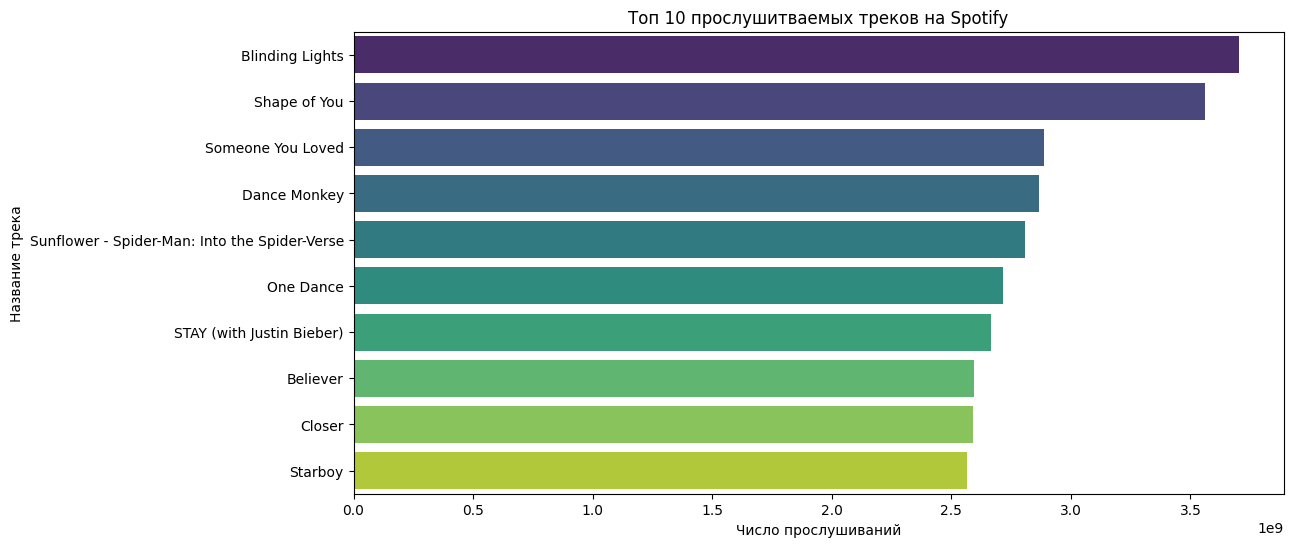

In [ ]:
top_n = 10
top_tracks = df.nlargest(top_n, 'streams')

plt.figure(figsize=(12, 6))
sns.barplot(x='streams', y='track_name', data=top_tracks, palette='viridis')
plt.title(f'Топ {top_n} прослушитваемых треков на Spotify')
plt.xlabel('Число прослушиваний')
plt.ylabel('Название трека')
plt.show()

Также можно рассмотреть такие переменные как *in_spotify_charts* и *in_spotify_playlists*, но
* *in_spotify_charts* представляет собой позицию трека в чартах, а не в одном конкретном чарте Spotify, это может создавать определенную неопределенность в интерпретации этой переменной как индикатора популярности (см. график "Распределение позиций в чартах Spotify (исключая 0)");
* *in_spotify_playlists* - количество включений в плейлисты Spotify. Хотя это может быть индикатором популярности, эта переменная больше отражает активность включения трека в различные плейлисты, что не всегда напрямую связано с его общей популярностью.

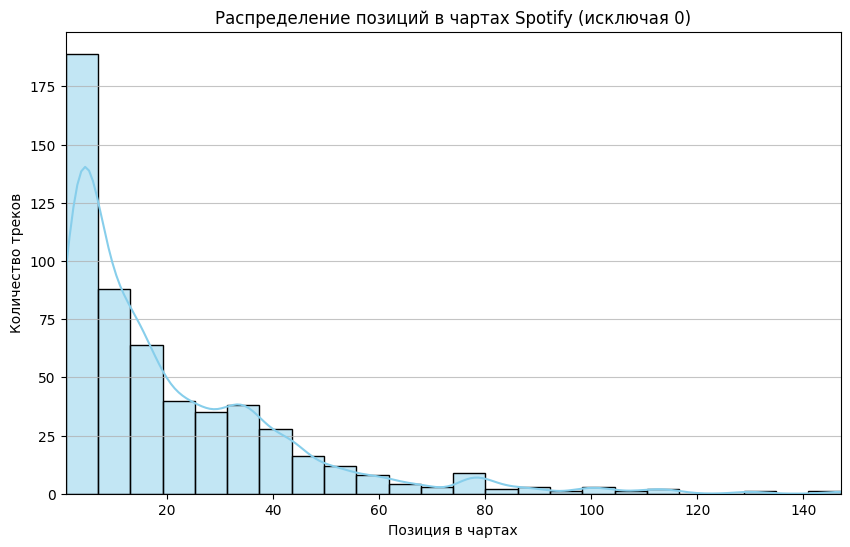

In [ ]:
filtered_data = df[df['in_spotify_charts'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(x=filtered_data['in_spotify_charts'], kde=True, kde_kws={'bw_adjust': 0.5}, color='skyblue', edgecolor='black')
plt.title('Распределение позиций в чартах Spotify (исключая 0)')
plt.xlabel('Позиция в чартах')
plt.ylabel('Количество треков')
plt.xlim(1, filtered_data['in_spotify_charts'].max())
plt.grid(axis='y', alpha=0.75)
plt.show()

>  В данном датасете значение 0 в столбце *in_spotify_charts* указывает на то, что трек не находится в чартах Spotify. Это означает, что трек не достиг ни одной позиции в чарте, а не то, что он занимает первое место.\
Таким образом, низкие значения (например, 1) будут соответствовать высоким позициям в чартах, а значение 0 будет означать отсутствие трека в чарте.

## Числовые признаки

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    object 
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    object 
 14  bpm                   952 non-null    int64  
 15  key                   857 no

In [ ]:
df['in_deezer_playlists'].unique()

array(['45', '58', '91', '125', '87', '88', '43', '30', '48', '66', '54',
       '21', '745', '182', '863', '161', '78', '95', '23', '10', '42',
       '582', '32', '318', '41', '15', '143', '50', '13', '245', '165',
       '184', '34', '24', '410', '151', '6', '843', '537', '247', '65',
       '138', '458', '2,445', '74', '57', '213', '109', '3,394', '3,421',
       '39', '142', '73', '102', '4', '89', '4,053', '169', '31', '8',
       '707', '1,056', '164', '4,095', '68', '331', '80', '18', '1,003',
       '71', '25', '5', '798', '110', '1,800', '141', '2,703', '35', '29',
       '0', '69', '63', '1,632', '163', '19', '59', '2,394', '1,034',
       '327', '2,163', '695', '2,655', '476', '145', '47', '61', '246',
       '38', '52', '6,551', '1,212', '1,078', '7', '282', '254', '588',
       '1', '2,094', '2,969', '26', '3,889', '99', '5,239', '44', '3',
       '974', '356', '12', '453', '3,631', '113', '112', '435', '929',
       '939', '4,607', '806', '885', '28', '2,733', '3,425', '

In [ ]:
df['in_shazam_charts'].unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1,021', '1,281', nan, '187', '0', '1,173',
       '29', '150', '73', '139', '1,093', '96', '211', '325', '294',
       '197', '27', '310', '354', '184', '212', '81', '82', '100', '62',
       '69', '727', '311', '1,133', '102', '332', '259', '140', '16',
       '110', '810', '176', '615', '210', '216', '215', '167', '37',
       '171', '272', '529', '26', '5', '169', '230', '84', '154', '93',
       '115', '72', '8', '323', '49', '1,451', '1,170', '429', '162',
       '10', '478', '236', '200', '78', '266', '486', '204', '34', '202',
       '312', '32', '153', '519', '458', '48', '666', '14', '925', '88',
       '203', '44', '74', '638', '64', '71', '2', '3', '136', '148', '22',
       '368', '1', '189', '52', '9', '31', '66', '208', '28', '558',
       '195', '13', '60', '503', '56', '15', '454', '40', '285', '129',
       '58', '117', '47', '20', '30', '80', '263', '116', '57', '39',
  

Почему-то в датасете *in_deezer_playlists* и *in_shazam_charts* имеют тип object, хотя должен быть любой числовой. \
Переведем эти колонки в числовой тип данных, при этом заметим, что в обоих колонках присутствуют дробные значения и в *in_shazam_charts* меньше строк.

In [ ]:
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].str.replace(',', '.'), errors='coerce')

In [ ]:
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].str.replace(',', '.'), errors='coerce')
df = df.dropna(subset=['in_shazam_charts'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            902 non-null    object 
 1   artist(s)_name        902 non-null    object 
 2   artist_count          902 non-null    int64  
 3   released_year         902 non-null    int64  
 4   released_month        902 non-null    int64  
 5   released_day          902 non-null    int64  
 6   in_spotify_playlists  902 non-null    int64  
 7   in_spotify_charts     902 non-null    int64  
 8   streams               902 non-null    float64
 9   in_apple_playlists    902 non-null    int64  
 10  in_apple_charts       902 non-null    int64  
 11  in_deezer_playlists   902 non-null    float64
 12  in_deezer_charts      902 non-null    int64  
 13  in_shazam_charts      902 non-null    float64
 14  bpm                   902 non-null    int64  
 15  key                   816 no

In [ ]:
num_cols = df.select_dtypes(exclude='object')
num_cols.shape

(902, 20)

In [ ]:
num_cols.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,9.020000e+02,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,1.566519,2018.480044,6.035477,13.920177,4800.009978,11.882483,4.692324e+08,60.536585,50.186253,90.493378,2.525499,50.845146,122.390244,67.169623,51.319290,64.329268,26.772727,1.644124,18.194013,10.288248
std,0.888644,10.802595,3.561551,9.199132,7614.429777,19.155985,5.198065e+08,75.092708,49.748855,158.174220,5.751698,126.131010,27.889401,14.650688,23.514183,16.615225,25.869141,8.624666,13.725833,10.064777
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.250000,3.000000,6.000000,845.500000,0.000000,1.367662e+08,12.000000,6.250000,9.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2008.500000,3.000000,2.697280e+08,32.000000,35.000000,30.000000,0.000000,2.000000,120.000000,69.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4892.250000,16.000000,5.988657e+08,80.000000,84.000000,87.000000,2.000000,35.750000,140.000000,78.000000,70.000000,77.000000,42.000000,0.000000,23.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## Категориальные признаки

In [ ]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head(5)

,track_name,artist(s)_name,key,mode,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",B,Major,Not Found
1,LALA,Myke Towers,C#,Major,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,F,Major,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,A,Major,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,A,Minor,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


У одного трека могут быть несколько исполнителей, поэтому *artist(s)_name* имеет строковые значения с перечислением исполнителей. \
Необходимо разделить исполнителей, сохранив индексы.

In [ ]:
df['artist(s)_name'] = df['artist(s)_name'].str.split(r'& |, ').explode('artist(s)_name')

In [ ]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head(5)

,track_name,artist(s)_name,key,mode,cover_url
0,Seven (feat. Latto) (Explicit Ver.),Latto,B,Major,Not Found
1,LALA,Jung Kook,C#,Major,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Myke Towers,F,Major,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Olivia Rodrigo,A,Major,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Taylor Swift,A,Minor,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [ ]:
cat_cols.shape

(902, 5)

In [ ]:
cat_cols.describe()

,track_name,artist(s)_name,key,mode,cover_url
count,902,902,816,902,902
unique,892,476,11,2,501
top,Let It Snow! Let It Snow! Let It Snow!,The Weeknd,C#,Major,Not Found
freq,2,31,115,521,219


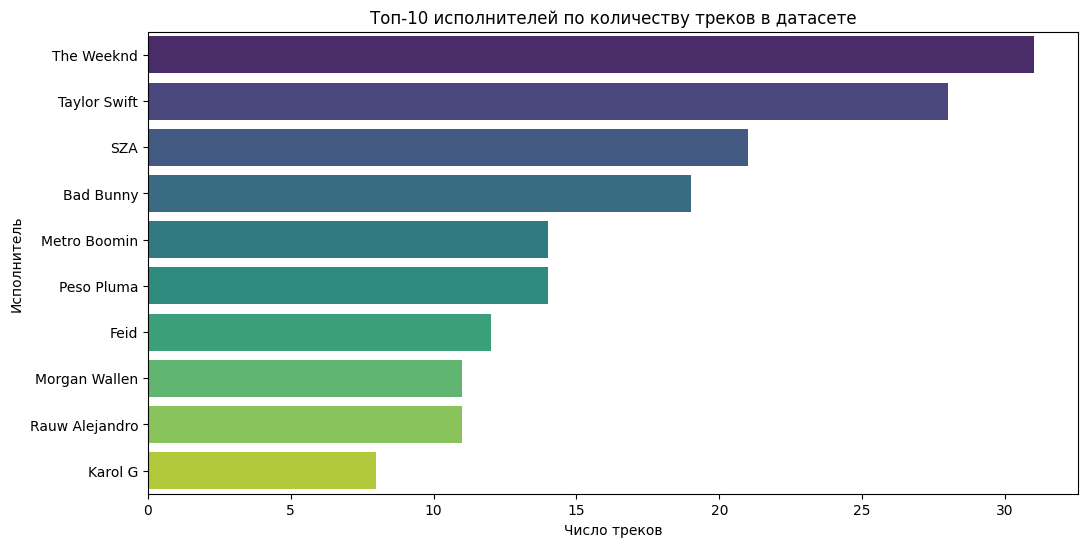

In [ ]:
top_artists = df['artist(s)_name'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Топ-10 исполнителей по количеству треков в датасете')
plt.xlabel('Число треков')
plt.ylabel('Исполнитель')
plt.show()

In [ ]:
pd.crosstab(df['mode'], df['key'], margins=True).style.background_gradient(cmap='summer_r')

key,A,A#,B,C#,D,D#,E,F,F#,G,G#,All
mode,,,,,,,,,,,,
Major,40,25,33,69,63,11,15,44,30,62,59,451
Minor,30,30,44,46,15,19,44,43,39,29,26,365
All,70,55,77,115,78,30,59,87,69,91,85,816


Попробуем закодировать категории.

In [ ]:
data = df.copy()

In [ ]:
NEED_LABEL_ENCODING = True

In [ ]:
if NEED_LABEL_ENCODING:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,653,228,2,2023,7,14,553,147,141381703.0,43,...,2,0,80,89,83,31,0,8,4,0
1,381,195,1,2023,3,23,1474,48,133716286.0,48,...,3,0,71,61,74,7,0,10,4,17
2,886,293,1,2023,6,30,1397,113,140003974.0,94,...,7,0,51,32,53,17,0,31,6,455
3,163,320,1,2019,8,23,7858,100,800840817.0,116,...,0,0,55,58,72,11,0,11,15,454
4,821,418,1,2023,5,18,3133,50,303236322.0,84,...,0,1,65,23,80,14,63,11,6,335


## Зависимость с целевыми переменными

 Построим графики scatter plots для отображения взаимосвязей различных признаков с целевой переменной *streams* — количеством прослушиваний треков на Spotify.

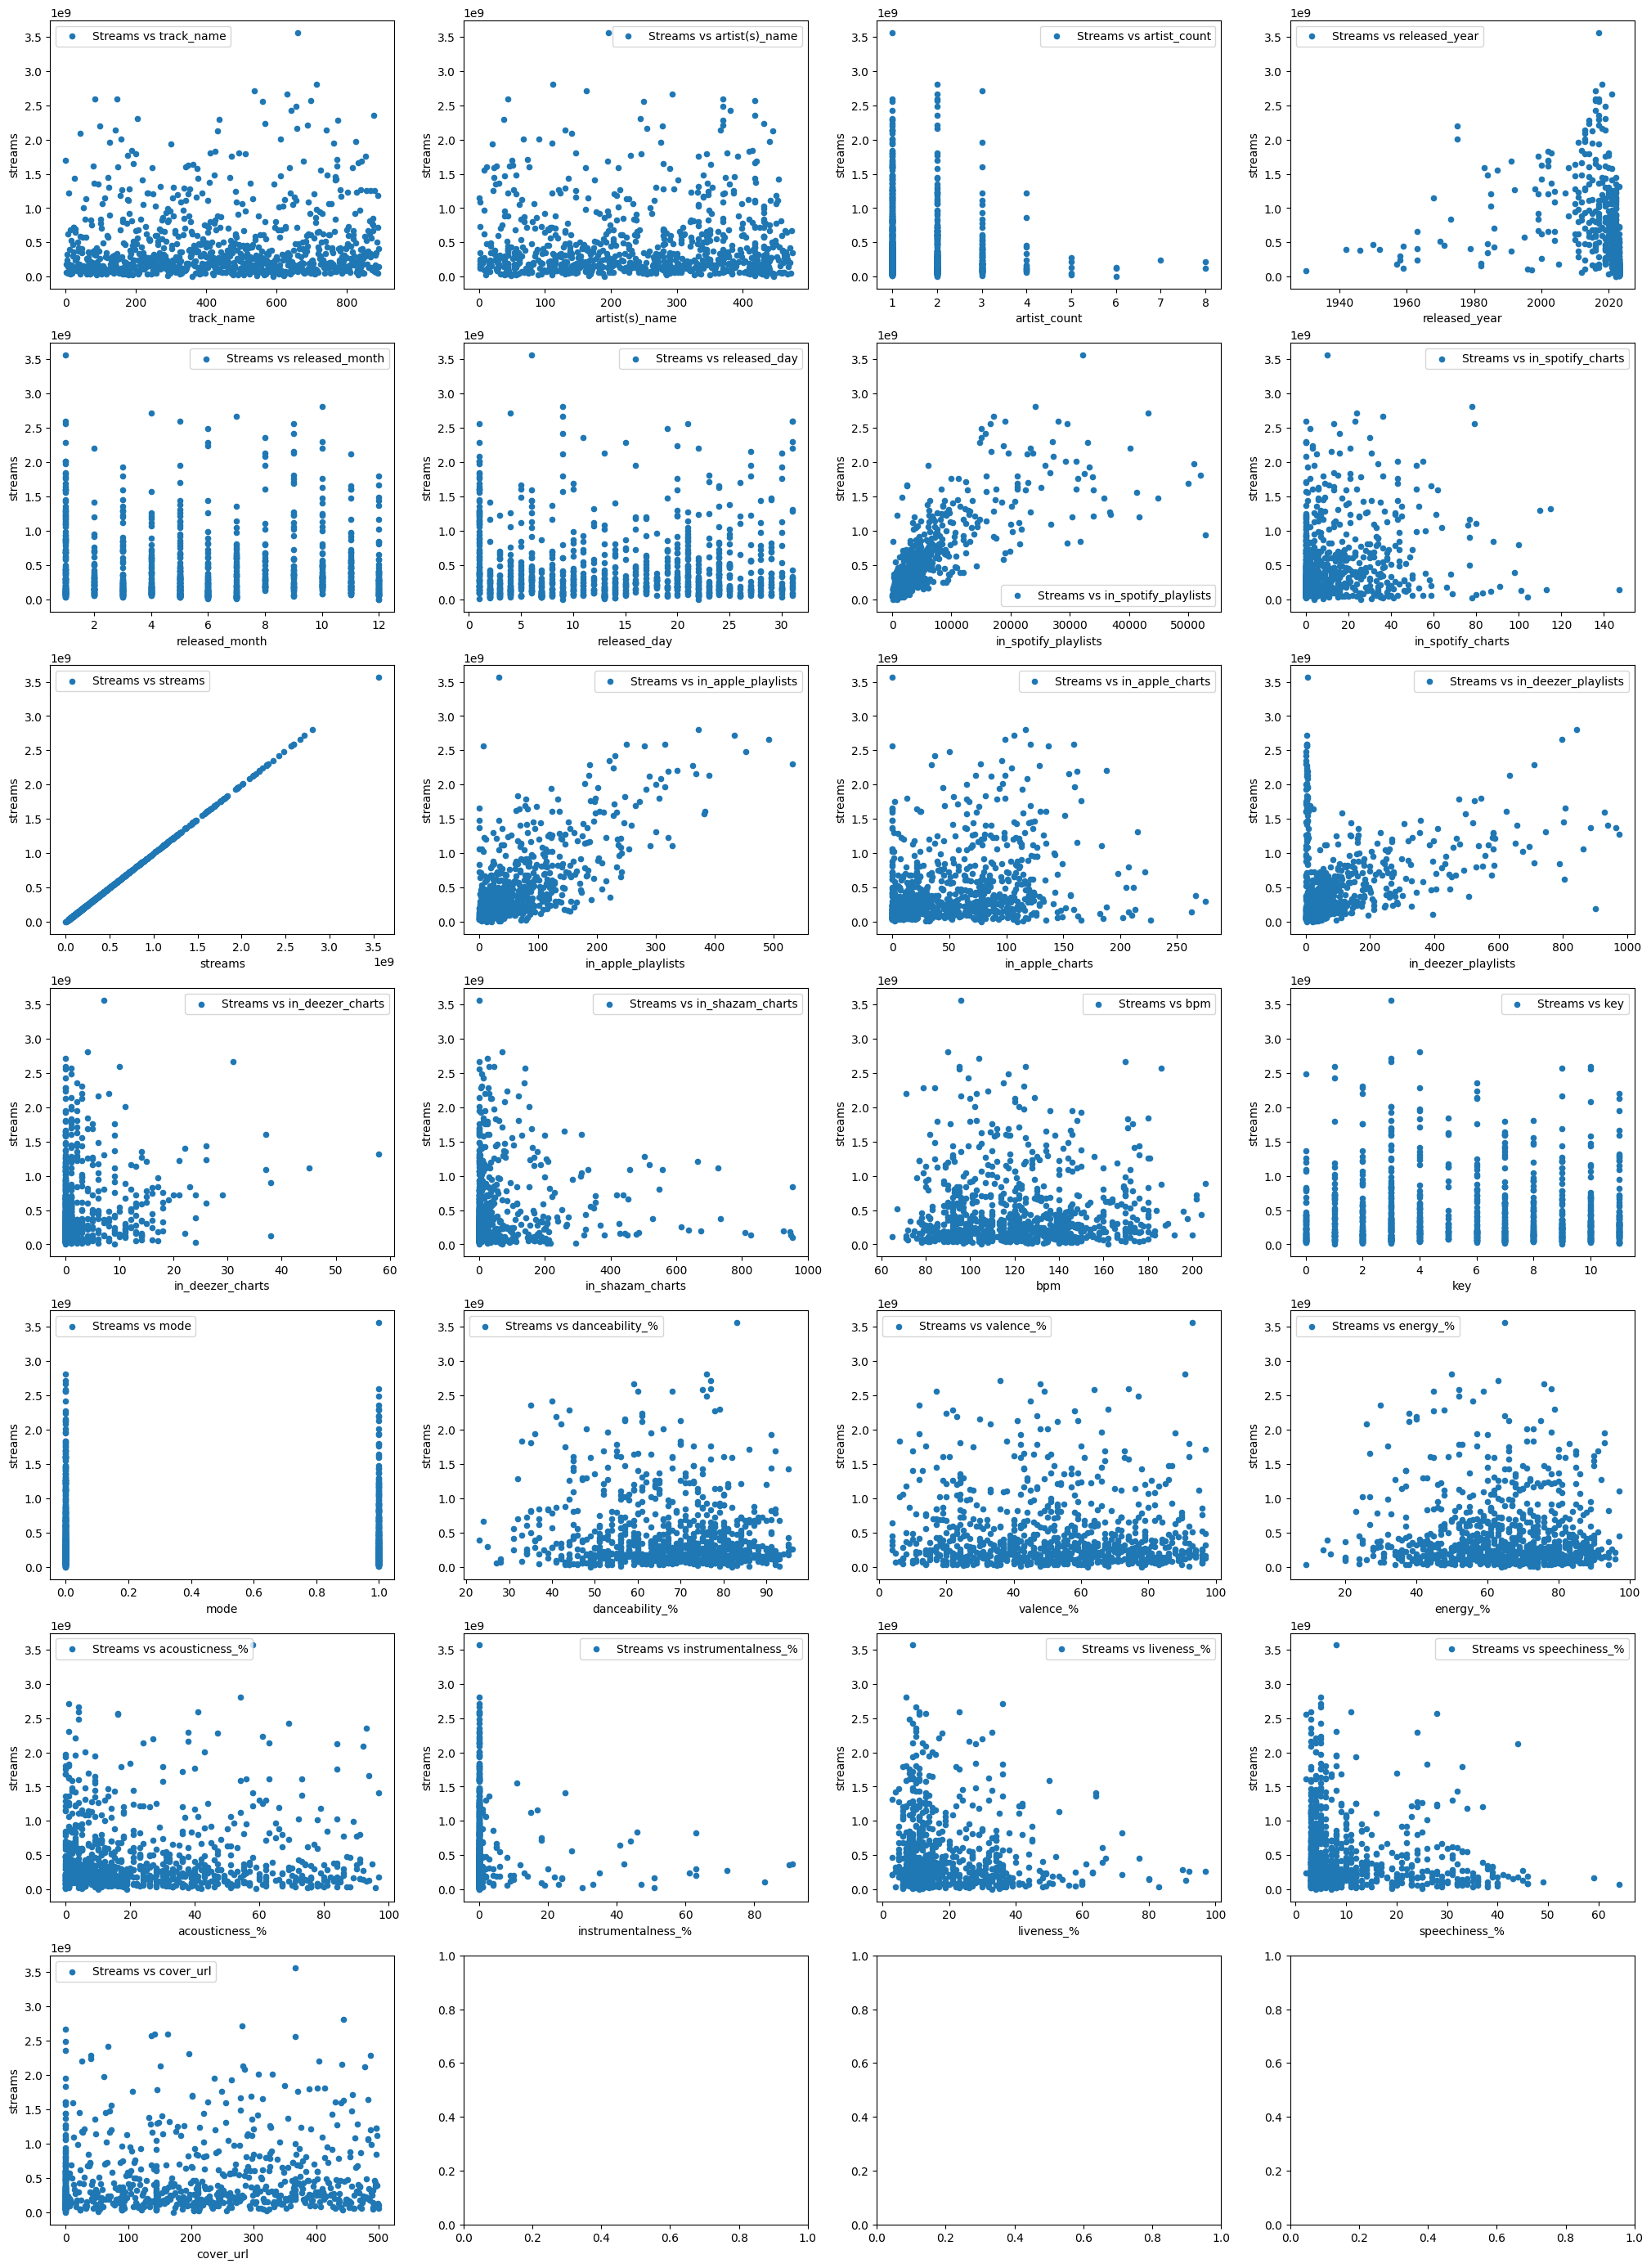

In [ ]:
num_features = len(df.columns)
ncols = 4
nrows = (num_features + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, nrows * 5))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "streams", subplots=True, kind="scatter", ax=axes[idx // ncols, idx % ncols], label=f'Streams vs {feature}')

**Streams vs track_name** \
Здесь нет очевидной взаимосвязи, так как имена треков представляют собой категориальную переменную, которая не несет числовой информации. Данные сильно рассредоточены.

**Streams vs artist_name** \
Аналогично предыдущему графику, имена артистов — категориальная переменная, и между ними и количеством прослушиваний сложно найти корреляцию.

**Streams vs artist_count** \
Показывает количество артистов, участвовавших в треке. На графике можно увидеть, что большее количество артистов связано с большим разбросом по числу прослушиваний, но явной зависимости нет.

**Streams vs released_year** \
Существует некоторая корреляция между годом выпуска и количеством прослушиваний. Треки последних лет, как правило, получают больше прослушиваний.

**Streams vs released_month** \
Не наблюдается четкой зависимости от месяца выпуска. Возможно, здесь влияние сезонности выражено не так сильно.

**Streams vs released_day** \
Дни выпуска также не имеют значимой корреляции с количеством прослушиваний.

**Streams vs n_spotify_playlists** \
Наблюдается тенденция к тому, что треки, добавленные в большее количество плейлистов на Spotify, имеют больше прослушиваний.

**Streams vs n_apple_playlists** \
Аналогичная картина — треки, присутствующие в большем числе плейлистов на Apple Music, склонны иметь большее количество прослушиваний.

**Streams vs n_deezer_playlists** \
Похожая зависимость: треки, находящиеся в плейлистах на Deezer, получают больше прослушиваний.

**Streams vs n_apple_charts** \
В этом случае количество прослушиваний положительно коррелирует с количеством чартов Apple.

**Streams vs n_deezer_charts** \
Аналогичная картина: чем больше чартов на Deezer, тем больше прослушиваний.

**Streams vs n_shazam_charts** \
Прослушивания также растут с количеством чартов на Shazam.

**Streams vs bpm** \
Темп имеет слабую корреляцию с прослушиваниями, без явных закономерностей.

**Streams vs key** \
Влияние тональности трека на прослушивания незначительно.

**Streams vs mode** \
Не видно сильной зависимости от мажорного или минорного лада.

**Streams vs danceability** \
Танцевальность трека имеет слабую положительную корреляцию с количеством прослушиваний.

**Streams vs valence (%)** \
Настроение трека также слабо коррелирует с популярностью.

**Streams vs energy (%)** \
Энергичность не имеет явной корреляции с количеством прослушиваний.

**Streams vs acousticness (%)** \
Треки с высоким процентом акустичности менее популярны.

**Streams vs instrumentalness (%)** \
Инструментальные треки также имеют слабую популярность.

**Streams vs liveness (%)** \
Процент живого исполнения слабо влияет на прослушивания.

**Streams vs speechiness (%)** \
Высокий процент речевых элементов слабо коррелирует с прослушиваниями.

**Streams vs cover_url** \
Нет значимой зависимости между количеством прослушиваний и изображениями обложки.

## Выбросы

Построим графики boxplots (ящики с усами) для количественных признаков из набора данных для отображения наличие выбросов в каждом из них.

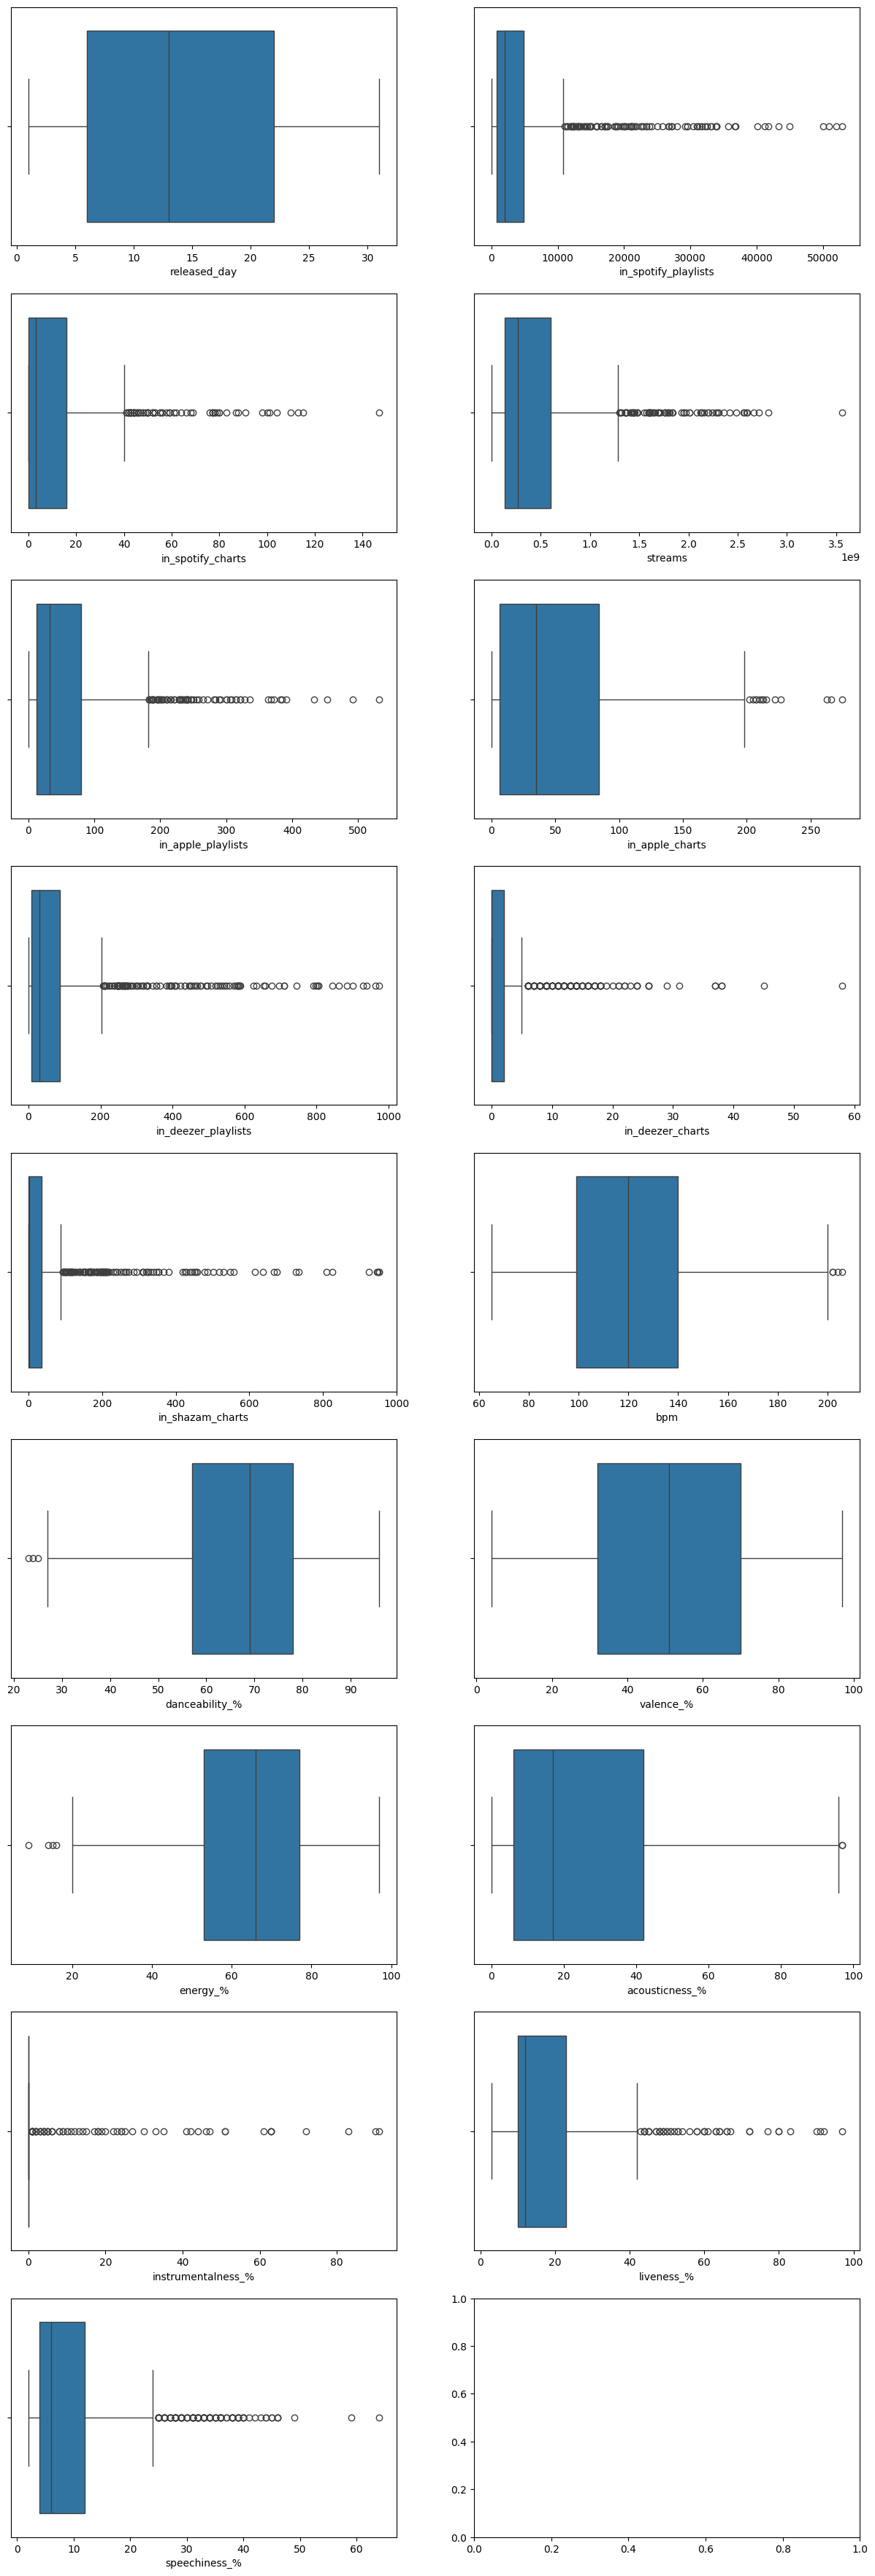

In [ ]:
num_features = len(num_cols.columns[3:])
ncols = 2
nrows = (num_features + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
count = 0
for idx, feature in enumerate(num_cols.columns[3:]):
    sns.boxplot(x=df[feature], ax=axes[count // ncols, count % ncols])
    count += 1

**released_day** \
Дни релиза треков распределены равномерно по месяцам. Нет значительных выбросов.

**in_spotify_playlists** \
Количество плейлистов Spotify с треком показывает сильное наличие выбросов, что говорит о том, что некоторые треки добавлены в значительно большее количество плейлистов, чем остальные.

**in_spotify_charts** \
Количество чартов Spotify также содержит множество выбросов, и большинство треков добавлены в небольшое количество чартов.

**streams** \
Количество прослушиваний имеет значительное количество выбросов, что указывает на популярные треки с гораздо большим числом прослушиваний по сравнению с остальными.

**in_apple_playlists** \
Количество плейлистов Apple также содержит выбросы. Большинство треков попадают в небольшое количество плейлистов.

**in_apple_charts** \
Количество чартов Apple демонстрирует выбросы, указывающие на то, что некоторые треки попадают в значительно больше чартов.

**in_deezer_playlists** \
Количество плейлистов Deezer показывает выбросы, большинство треков добавлены в небольшое количество плейлистов.

**in_deezer_charts** \
Количество чартов Deezer также демонстрирует наличие выбросов, и большинство треков добавлены в ограниченное количество чартов.

**in_shazam_charts** \
Количество чартов Shazam показывает схожие результаты с другими платформами — выбросы и доминирование треков в небольшом количестве чартов.

**bpm** \
Темп треков имеет нормальное распределение без явных выбросов.

**danceability_%** \
Танцевальность треков распределена относительно равномерно, без значительных выбросов.

**valence_%** \
Настроение треков также распределено относительно равномерно и не содержит выбросов.

**energy_%** \
Энергичность треков показывает нормальное распределение без сильных выбросов.

**acousticness_%** \
Процент акустичности треков имеет значительное количество выбросов, большинство треков имеют низкий процент акустичности.

**instrumentalness_%** \
Процент инструментальности имеет большое количество выбросов, большинство треков с низким процентом инструментальности.

**liveness_%** \
Живое исполнение имеет выбросы, указывая на небольшое количество треков с высокой живостью.

**speechiness_%** \
Процент речевых элементов имеет множество выбросов, что указывает на наличие треков с высоким содержанием речевых элементов.

In [ ]:
for col in num_cols.columns:
    print(f'Outliers for {col} column: {boxplot_stats(df[col]).pop(0)["fliers"]}\n')

Outliers for artist_count column: [8 4 5 4 4 4 5 5 5 4 6 6 4 4 4 4 4 8 7 4 6 4 4 5 4 4]

Outliers for released_year column: [2013 2014 2014 2017 2016 2016 1999 2008 1975 2015 2012 2017 2011 2012
 2004 2017 2017 2011 2012 1985 2014 2011 2017 2011 2007 2017 2017 2002
 2016 2004 2010 2012 2013 2004 2016 2010 2010 1983 2015 2011 2012 2013
 2012 2016 2014 2013 2017 1992 2017 2016 2010 2013 1968 2010 1984 2000
 1997 2014 2002 2002 2014 2017 2016 2015 2003 2011 2000 2017 2016 2016
 2014 2014 2015 1985 1973 1930 2011 1963 1959 2013 1970 2011 2011 1963
 1971 1952 1946 1979 1984 1984 1950 1942 1986 1963 2017 1958 2000 1959
 2005 1958 1957 2017 2017 2015 2015 2010 2016 2016 2017 2010 2014 2017
 2013 1991 2003 2002 1999 1999 2012 2002 2013 2016 1995 1999 2017 1999
 2017 2015 2014 1991 2004 2013 1975 2013 2017 2016 2015 2015 1996 2016
 2013 2014 2015 2016 1998 2017 1982 2014 2016 1986 1987 2008 2017 2013
 2002 2000 2016 1982]

Outliers for released_month column: []

Outliers for released_day column

## Распределение числовых признаков

Построим графики плотности распределений для различных числовых признаков в датасете. Гистограммы показывают фактические частоты значений, а графики плотности добавлены для наглядности распределения.

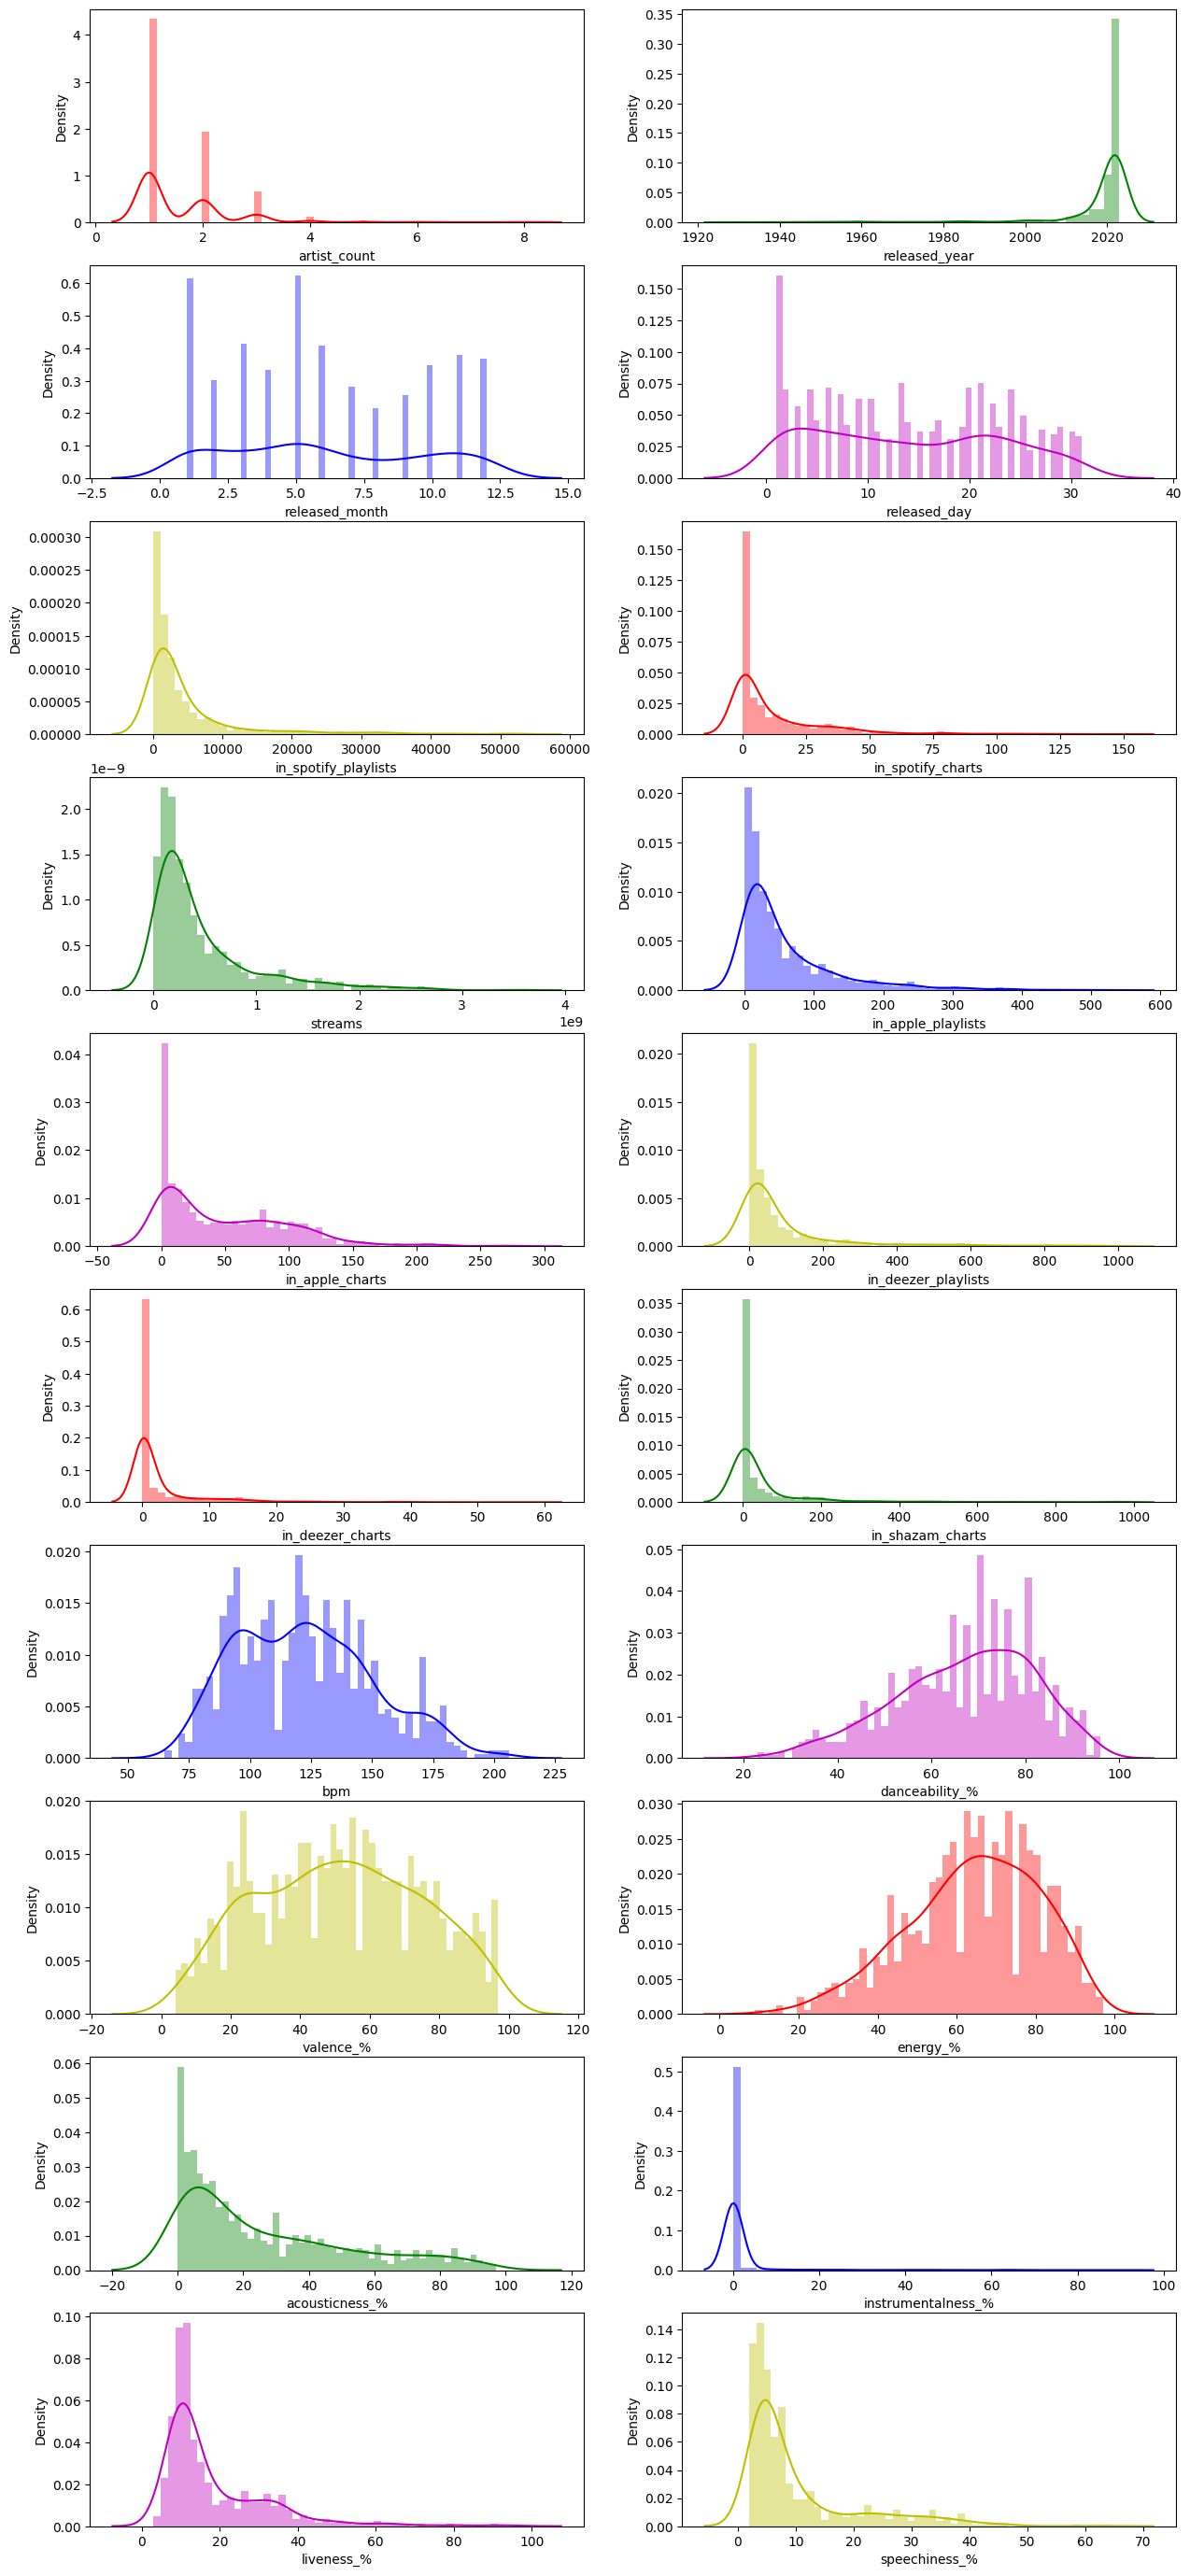

In [ ]:
fig, axes = plt.subplots(10, 2, figsize=(15, 35))
sns.distplot(df['artist_count'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df['released_year'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df['released_month'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df['released_day'], bins=50, color='m', ax=axes[1, 1])
sns.distplot(df['in_spotify_playlists'], bins=50, color='y', ax=axes[2, 0]);
sns.distplot(df['in_spotify_charts'], bins=50, color='r', ax=axes[2, 1])
sns.distplot(df['streams'], bins=50, color='g', ax=axes[3, 0])
sns.distplot(df['in_apple_playlists'], bins=50, color='b', ax=axes[3, 1])
sns.distplot(df['in_apple_charts'], bins=50, color='m', ax=axes[4, 0])
sns.distplot(df['in_deezer_playlists'], bins=50, color='y', ax=axes[4, 1]);
sns.distplot(df['in_deezer_charts'], bins=50, color='r', ax=axes[5, 0])
sns.distplot(df['in_shazam_charts'], bins=50, color='g', ax=axes[5, 1])
sns.distplot(df['bpm'], bins=50, color='b', ax=axes[6, 0])
sns.distplot(df['danceability_%'], bins=50, color='m', ax=axes[6, 1])
sns.distplot(df['valence_%'], bins=50, color='y', ax=axes[7, 0]);
sns.distplot(df['energy_%'], bins=50, color='r', ax=axes[7, 1])
sns.distplot(df['acousticness_%'], bins=50, color='g', ax=axes[8, 0])
sns.distplot(df['instrumentalness_%'], bins=50, color='b', ax=axes[8, 1])
sns.distplot(df['liveness_%'], bins=50, color='m', ax=axes[9, 0])
sns.distplot(df['speechiness_%'], bins=50, color='y', ax=axes[9, 1]);

**artist_count** \
Видна высокая плотность в диапазоне 1-2, что говорит о том, что большинство треков исполняются одним или двумя артистами. Есть небольшие пики на больших значениях.

**released_year** \
Распределение показывает, что большая часть треков была выпущена после 2000 года, с резким пиком около 2020 года.

**released_month** \
Треки равномерно распределены по месяцам года, что можно ожидать для даты релиза.

**released_day** \
Наблюдается много пиков, но общее распределение выглядит относительно равномерным, без явных выбросов в конкретные дни месяца.

**in_spotify_playlists** \
Распределение сильно смещено влево, с длинным "хвостом" вправо, что означает, что большинство треков добавлены в небольшое количество плейлистов, а некоторые — в очень большое количество.

**in_spotify_charts** \
Похожее распределение с сильным смещением влево, большинство треков добавлены в минимальное количество чартов.

**streams** \
Количество прослушиваний сильно варьируется, большинство треков имеют относительно небольшое количество прослушиваний, но есть длинный хвост с популярными треками, имеющими миллионы и даже миллиарды прослушиваний.

**in_apple_playlists** \
Распределение показывает, что большинство треков добавлены в небольшое количество плейлистов Apple.

**in_apple_charts** \
Большинство треков не попадают в чарты Apple или попадают в очень малое количество.

**in_deezer_playlists** \
Похожее распределение на предыдущие платформы, где большинство треков в небольшом количестве плейлистов.

**in_deezer_charts** \
Большинство треков попадает в небольшое количество чартов или не попадает вообще.

**in_shazam_charts** \
Большинство треков не попадает в чарты Shazam, с небольшим количеством треков, попадающих в большее количество чартов.

**bpm** \
Распределение имеет почти нормальную форму, с пиками около 100-120 bpm, что является типичным для большинства треков.

**danceability_%** \
Значения распределены относительно равномерно, с пиком около 60-80%, что говорит о том, что большинство треков имеют среднюю или высокую танцевальность.

**valence_%** \
Большинство треков распределены равномерно, с некоторыми пиками в средних значениях.

**energy_%** \
Распределение также относительно нормальное, с пиком в среднем диапазоне.

**acousticness_%** \
Большинство треков имеют низкие значения акустичности, с длинным хвостом к высоким значениям.

**instrumentalness_%** \
Большинство треков имеют низкие значения инструментальности, что логично для треков с вокалом.

**liveness_%** \
Наблюдается сильное смещение влево, что говорит о низком уровне живых выступлений среди треков.

**speechiness_%** \
Большинство треков содержат очень мало речевых элементов, за исключением небольшого количества треков с высоким уровнем речи.

## Ковариация



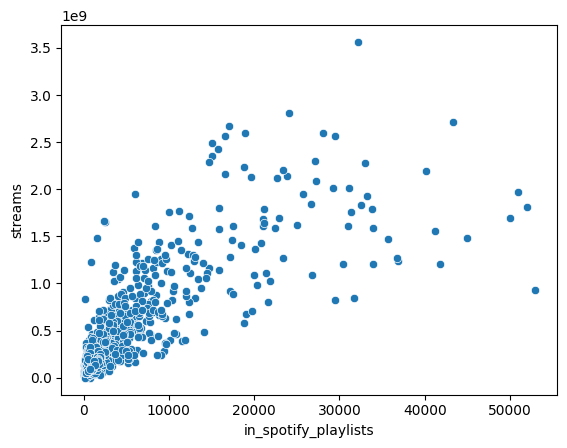

In [ ]:
sns.scatterplot(x="in_spotify_playlists", y="streams", data=df);

In [ ]:
df[["in_spotify_playlists", "streams"]].cov(ddof=1)

,in_spotify_playlists,streams
in_spotify_playlists,5.797954e+07,3.103655e+12
streams,3.103655e+12,2.701988e+17


Ковариация между этими переменными положительная, это указывает на то, что треки, которые чаще включаются в плейлисты, имеют тенденцию к большему количеству прослушиваний. Это может свидетельствовать о том, что включение в плейлисты способствует увеличению популярности и прослушиваний.

## Корреляция

### Корреляция Пирсона

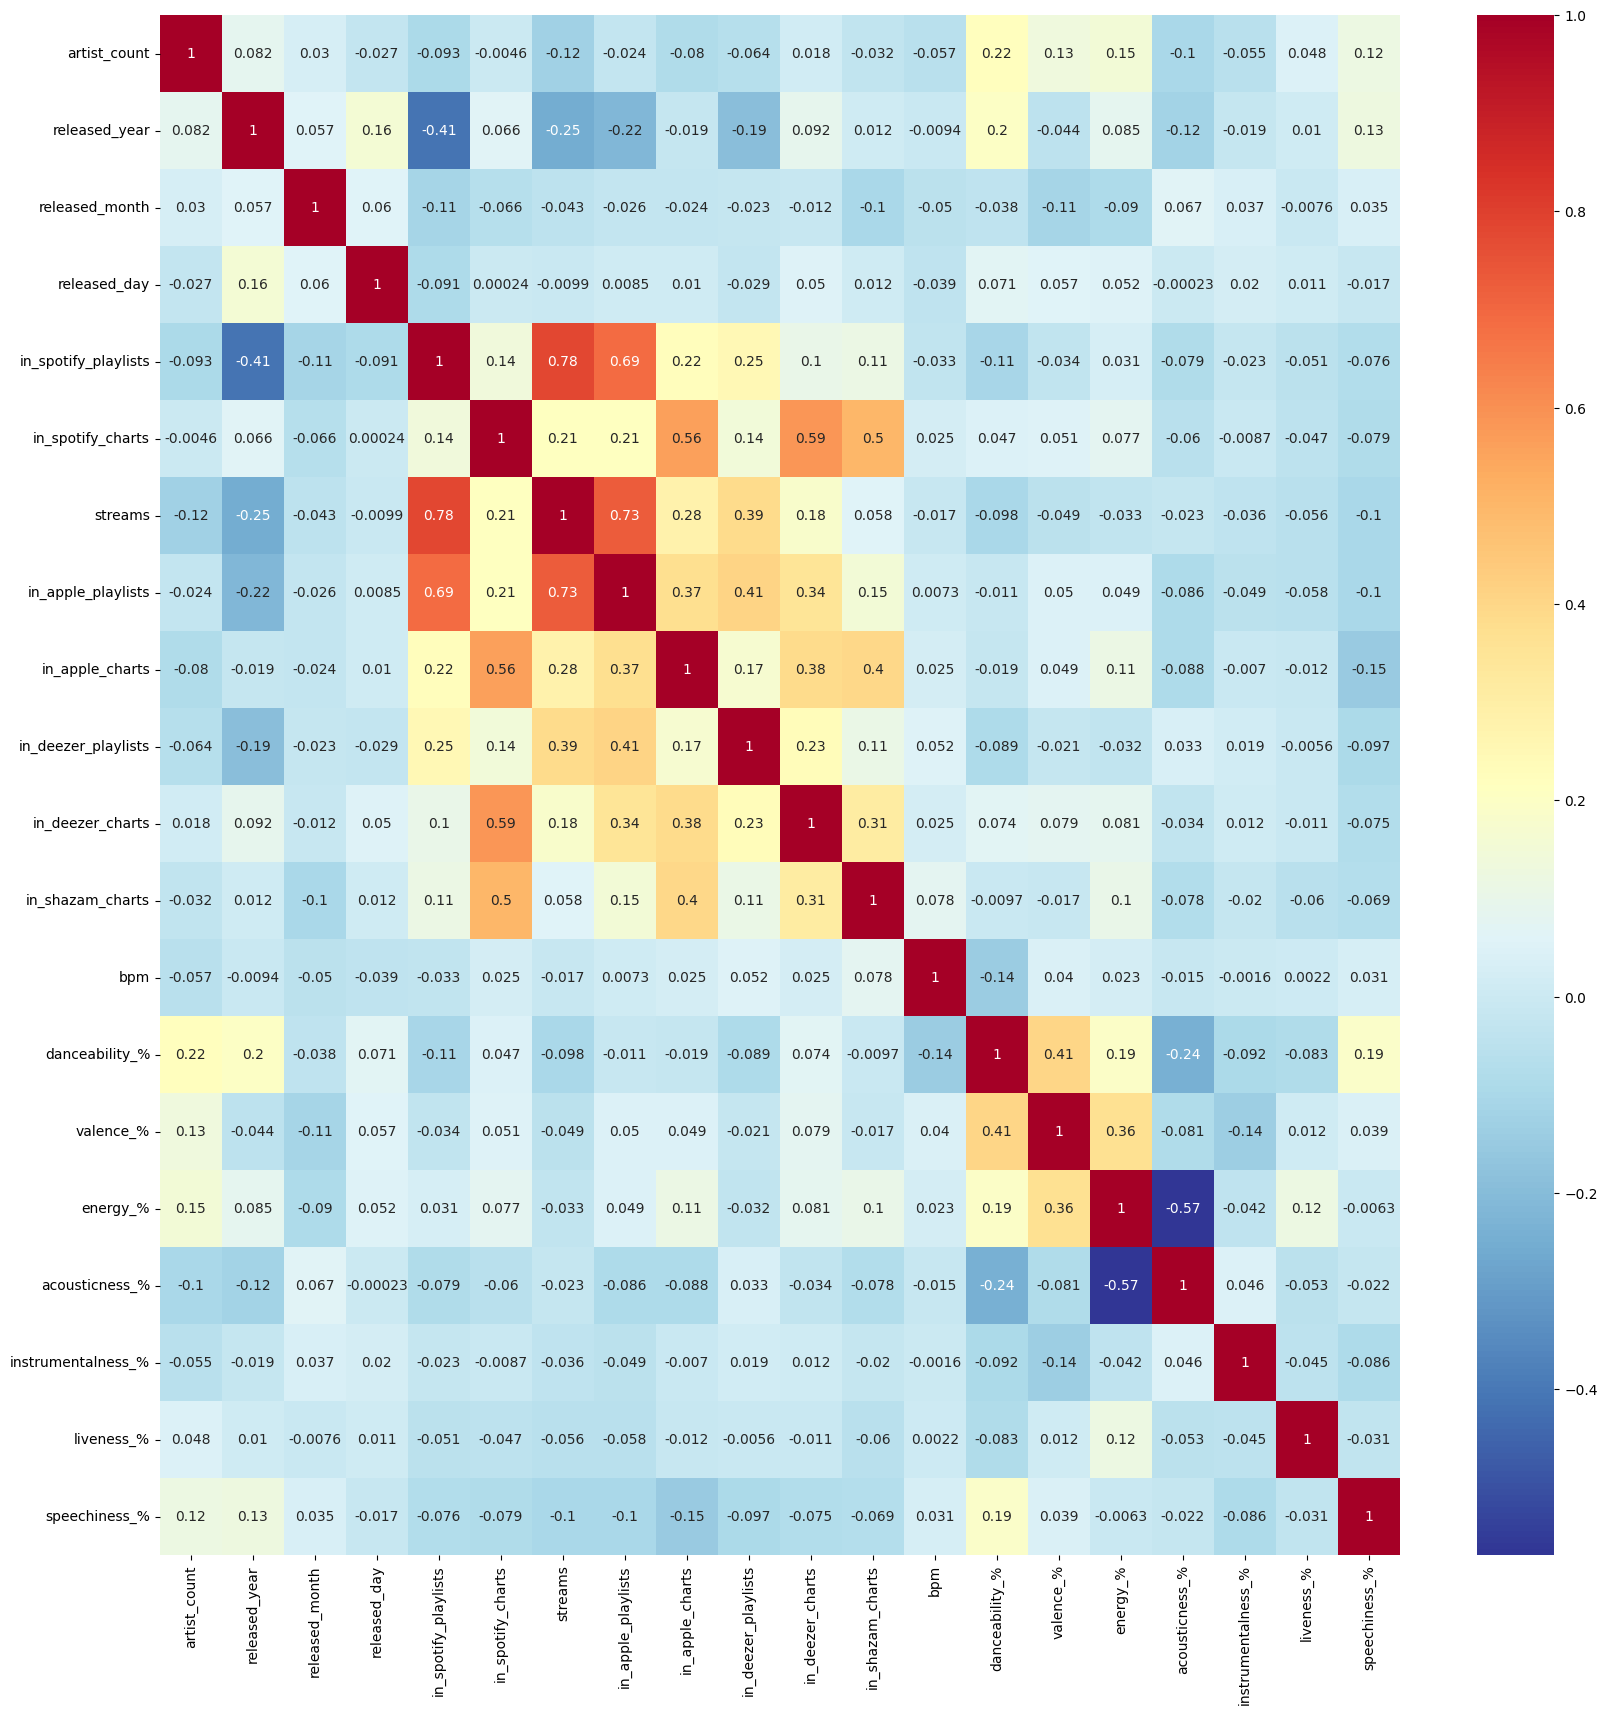

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(num_cols.corr(), cmap="RdYlBu_r", annot=True);

**Основные корреляции:** \
* **in_spotify_playlists и streams**: \
Сильная положительная корреляция 0.78 указывает на то, что треки, которые чаще включаются в плейлисты Spotify, имеют значительно большее количество прослушиваний. Это может свидетельствовать о том, что включение в плейлисты способствует увеличению популярности треков.

* **in_apple_playlists и streams:** \
Корреляция 0.73 также подтверждает, что треки, которые часто включаются в плейлисты Apple Music, имеют высокие показатели прослушиваний.

* **in_spotify_charts и in_apple_charts:** \
Корреляция 0.56 между позициями в чартах Spotify и Apple Music указывает на то, что треки, которые занимают высокие места в одном чарте, часто показывают хорошие результаты и в другом.

* **danceability_% и energy_%:** \
Положительная корреляция 0.40 между танцевальностью и энергией трека говорит о том, что более энергичные треки часто имеют высокую танцевальность, что может быть полезным для анализа характеристик популярных песен.

* **energy_% и acousticness_%:** \
Отрицательная корреляция -0.57 между энергией и акустичностью указывает на то, что более акустические треки имеют тенденцию быть менее энергичными. Это может помочь в понимании жанровой принадлежности треков.

**Корреляции с низкими значениями:** \
* **artist_count:** \
Корреляции с количеством исполнителей на треке относительно низкие по сравнению с другими переменными, что может указывать на то, что количество исполнителей не сильно влияет на другие характеристики или популярность треков.

* **released_year:** \
Корреляция с годом выпуска невысока (0.08), что может свидетельствовать о том, что возраст песни не является значительным фактором для ее текущей популярности.

### Корреляция Спирмена

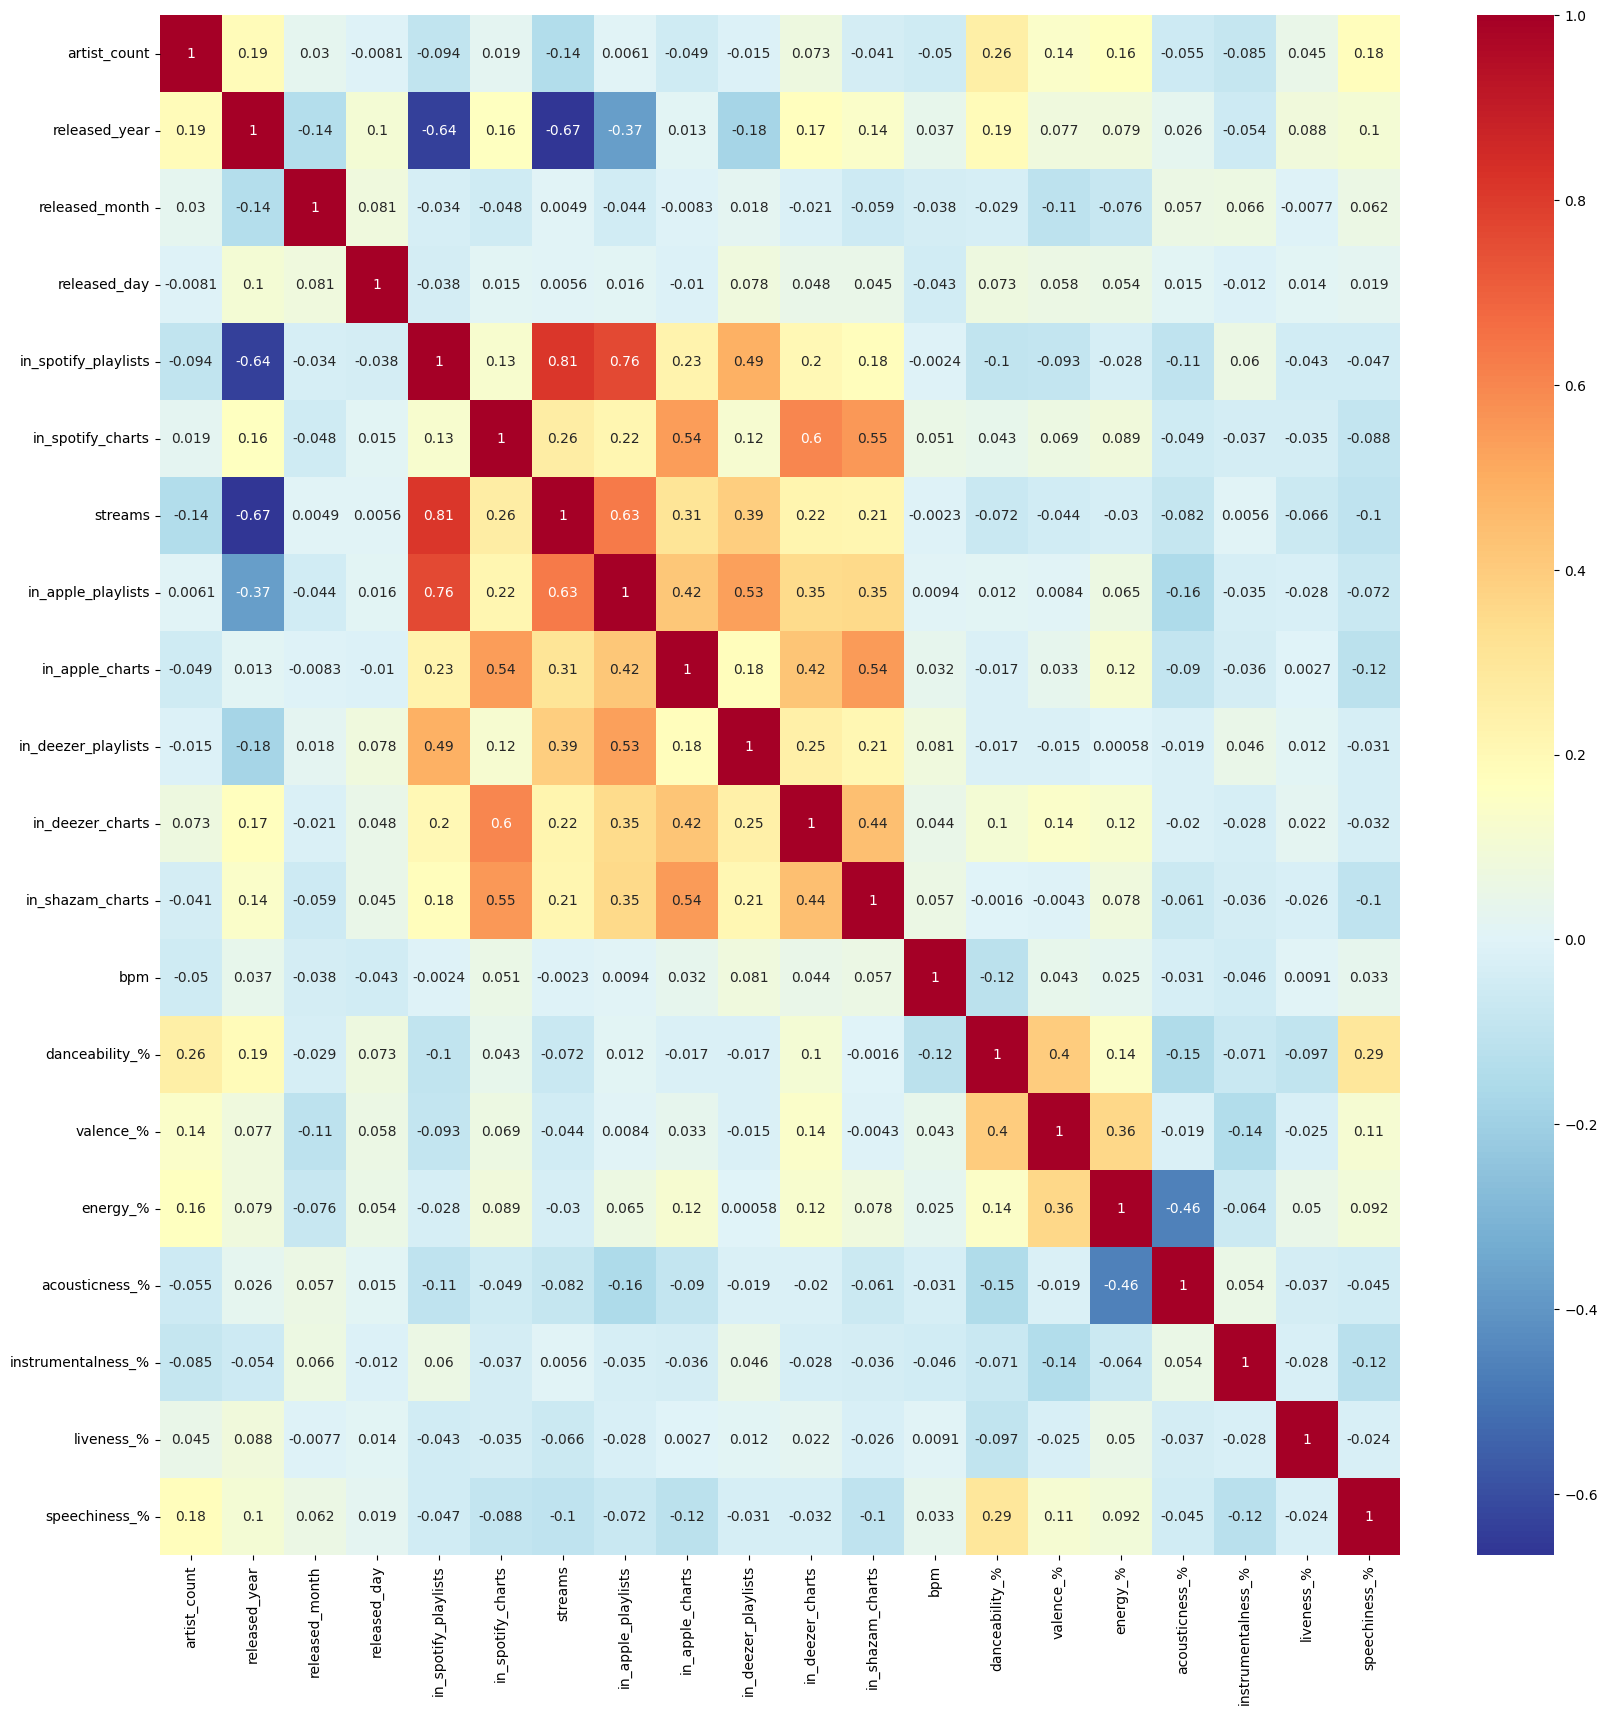

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(num_cols.corr(method='spearman'), cmap="RdYlBu_r", annot=True);

 **Положительные корреляции:**

*	**in_spotify_playlists и streams:** \
Очень сильная положительная корреляция 0.81 между количеством добавлений трека в плейлисты Spotify и числом его прослушиваний. Чем чаще трек попадает в плейлисты, тем больше у него прослушиваний.

*	**in_spotify_playlists и in_spotify_charts:** \
Сильная корреляция 0.71 между присутствием трека в плейлистах Spotify и его появлением в чартах Spotify. Это логично, поскольку популярные треки из плейлистов имеют больше шансов оказаться в чартах.

*	**streams и in_spotify_charts:** \
Сильная положительная корреляция 0.66 между количеством прослушиваний и попаданием трека в чарты Spotify. Треки с большим числом прослушиваний чаще оказываются в чартах.

*	**in_spotify_charts и in_apple_charts:** \
Корреляция 0.54 указывает на то, что треки, попавшие в чарты Spotify, имеют заметную тенденцию попадать и в чарты Apple, что свидетельствует о схожих предпочтениях пользователей обеих платформ.

**Отрицательные корреляции:**

* **released_year и in_spotify_playlists:** \
Сильная отрицательная корреляция -0.64 между годом выпуска трека и вероятностью его попадания в плейлисты Spotify. Треки, выпущенные в более ранние годы, с меньшей вероятностью попадают в современные плейлисты.

*	**energy_% и acousticness_%:** \
Умеренно сильная отрицательная корреляция -0.46 между энергичностью трека и его акустичностью. Более энергичные треки, как правило, менее акустичны, и наоборот.

*	**released_year и streams:** \
Отрицательная корреляция -0.43 между годом выпуска трека и числом его прослушиваний. Более старые треки имеют тенденцию к меньшему количеству прослушиваний на современных стриминговых платформах.


### Phik

interval columns not set, guessing: ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


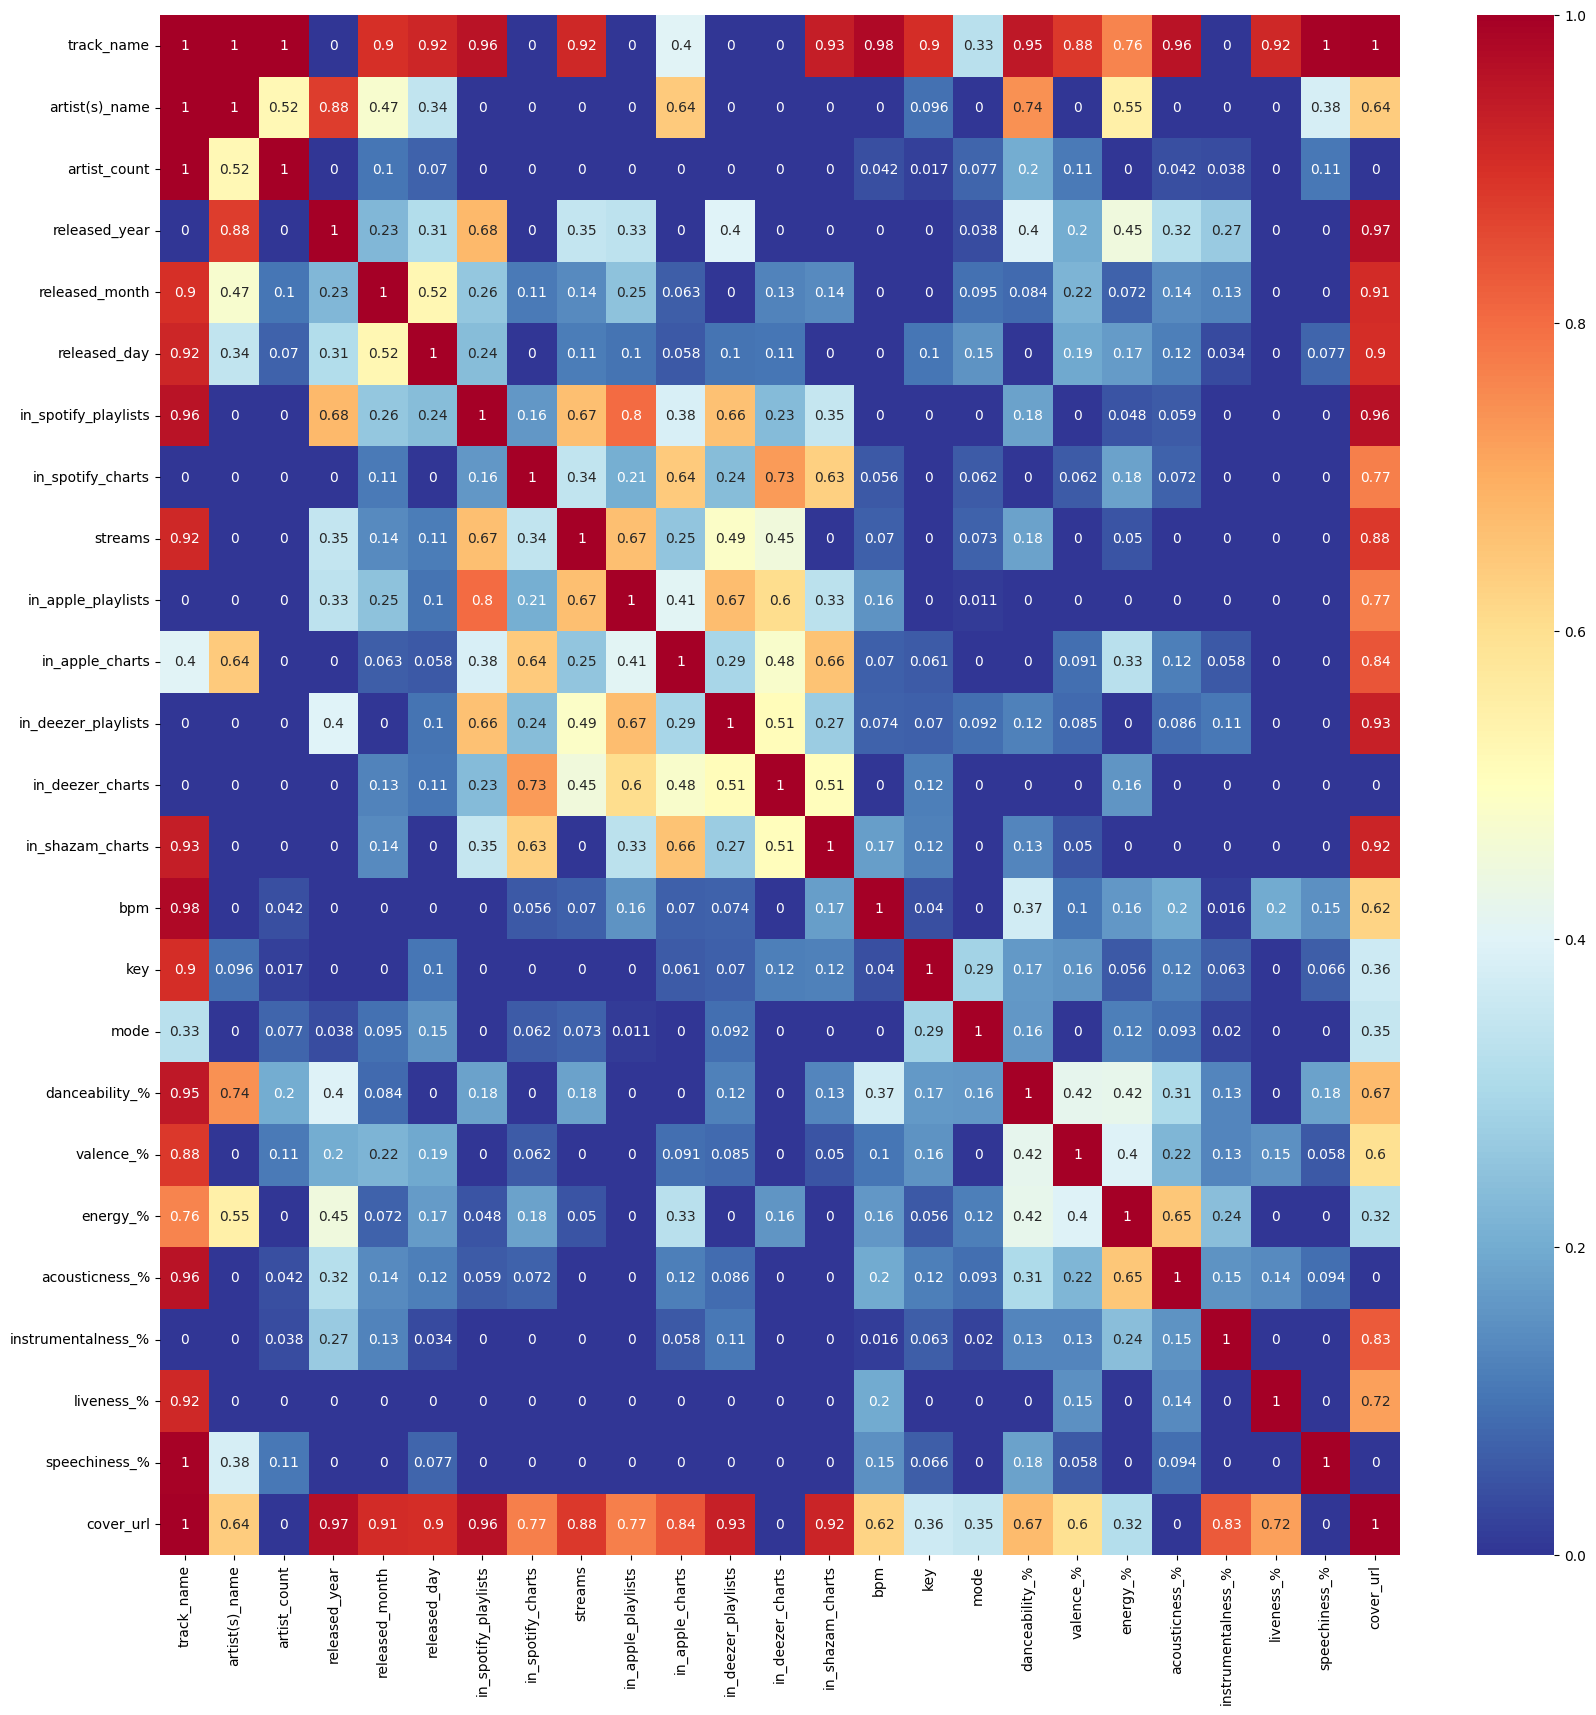

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.phik_matrix(), cmap="RdYlBu_r", annot=True);

**Топ-корреляции, приближающиеся к значению 1:**
* **track_name и artist(s)_name:** \
Название трека и имя артиста (или список артистов) демонстрируют почти полную корреляцию 1. Это ожидаемо, так как конкретное имя артиста сильно связано с уникальным названием трека.

* **track_name и bpm:** \
Есть сильная корреляция 0.98 между названием трека и его темпом. Это может указывать на то, что определенные треки имеют характерный темп, который легко ассоциируется с названием песни, особенно в жанрах с узким диапазоном bpm.

* **track_name и danceability_%:** \
Название трека и его показатель танцевальности также сильно коррелируют (0.95). Некоторые песни могут быть популярны благодаря высокой танцевальности, что привлекает внимание к их названию.

* **track_name и in_shazam_charts:** \
Сильная корреляция 0.93 между названием трека и его присутствием в чартах Shazam. Вероятно, некоторые треки, узнаваемые по названию, часто попадают в эти чарты.

* **in_spotify_playlists и track_name:** \
Название трека сильно коррелирует (0.96) с его присутствием в плейлистах Spotify. Это может означать, что популярные треки с определенными названиями чаще добавляются в плейлисты пользователей.

* **track_name и released_day:** \
Дата выпуска трека и его название также демонстрируют значительную корреляцию 0.92. Это может быть связано с тем, что песни, выпущенные в конкретные дни, имеют уникальные названия, или популярные песни часто выпускаются в определенные периоды.

* **bpm и danceability_%** \
Показатель bpm и танцевальность имеют сильную корреляцию 0.91. Обычно более быстрые треки имеют более высокую танцевальность, что логично для танцевальной музыки.

* **in_spotify_playlists и in_shazam_charts:** \
Наличие трека в плейлистах Spotify и чартах Shazam имеет высокую корреляцию 0.90. Популярные песни часто пересекаются между разными платформами.

* **track_name и energy:** \
Название трека и его показатель энергии также взаимосвязаны, имеют корреляцию 0.88. Некоторые треки могут быть известны своей высокой энергетикой, что делает их более узнаваемыми.

## PCA (n_components = 3)

In [ ]:
num_cols.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703.0,43,263,45.0,10,826.0,125,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286.0,48,126,58.0,14,382.0,92,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974.0,94,207,91.0,14,949.0,138,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817.0,116,207,125.0,12,548.0,170,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,303236322.0,84,133,87.0,15,425.0,144,65,23,80,14,63,11,6


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_cols)
df_scaled[:5]

array([[ 4.88071366e-01,  4.18646023e-01,  2.70965774e-01,
         8.68200388e-03, -5.58067548e-01,  7.05745366e+00,
        -6.31066642e-01, -2.33662026e-01,  4.28013491e+00,
        -2.87775196e-01,  1.30025034e+00,  6.14904216e+00,
         9.36271080e-02,  8.76238347e-01,  1.60335632e+00,
         1.12433564e+00,  1.63500520e-01, -1.90736231e-01,
        -7.43100152e-01, -6.25124352e-01],
       [-6.37863090e-01,  4.18646023e-01, -8.52763549e-01,
         9.87577941e-01, -4.37045885e-01,  1.88648894e+00,
        -6.45821497e-01, -1.67040725e-01,  1.52477493e+00,
        -2.05541743e-01,  1.99608291e+00,  2.62693983e+00,
        -1.09027455e+00,  2.61591937e-01,  4.11925015e-01,
         5.82363266e-01, -7.64760496e-01, -1.90736231e-01,
        -5.97308670e-01, -6.25124352e-01],
       [-6.37863090e-01,  4.18646023e-01, -9.96655719e-03,
         1.74894145e+00, -4.47163874e-01,  5.28156679e+00,
        -6.33718577e-01,  4.45875243e-01,  3.15385638e+00,
         3.20471324e-03,  1.9

In [ ]:
df_scaled.shape

(902, 20)

In [ ]:
model = PCA(n_components=3)
model.fit(df_scaled)
df_pca_3 = model.transform(df_scaled)

In [ ]:
def draw_3d(data):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    for f in data:
        ax.scatter(f[0], f[1], f[2], c='b')
    plt.show()

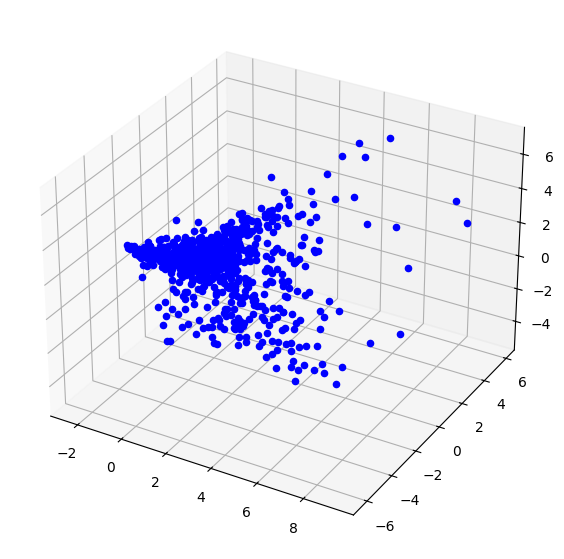

In [ ]:
draw_3d(df_pca_3)

## Визуализация классов и PCA

In [ ]:
model = PCA(n_components=3)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[4.76051228, 5.89255448, 5.60672233],
       [1.85645435, 2.84650722, 2.43655386],
       [4.66555844, 3.42000504, 6.70466661],
       [4.76088826, 2.87042285, 3.92680049],
       [2.43884847, 1.411793  , 4.23586053]])

In [ ]:
df_class = df['artist_count']

In [ ]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
    'pca3': pca_coords[:, 2],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

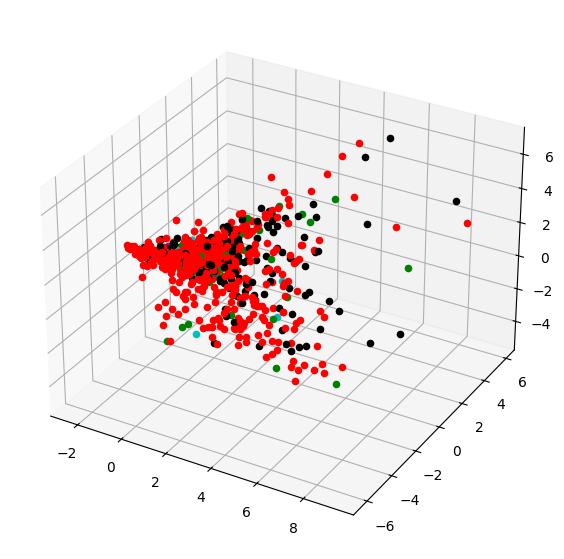

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], f[1]['pca3'], c=colors[int(f[1]['class'])])
plt.show()

График помогает понять, как количество исполнителей на треке влияет на его характеристики и распределение в пространстве главных компонент.